In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/day.csv


In [214]:
import pandas as pd

In [215]:
df = pd.read_csv('../input/bike-sharing-dataset/hour.csv')

In [216]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [217]:
df.shape

(17379, 17)

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [220]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [221]:
import warnings
warnings.filterwarnings("ignore")
df['day']= df['dteday'].apply(lambda x: x[8:])

In [222]:
df['day']

0        01
1        01
2        01
3        01
4        01
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: object

In [223]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [224]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01


In [225]:
df['season'].unique()

array([1, 2, 3, 4])

In [226]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [227]:
season_dict

{1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [228]:
df['Season_cat'] = df['season'].map(season_dict)

In [229]:
df['Season_cat']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17374    Spring
17375    Spring
17376    Spring
17377    Spring
17378    Spring
Name: Season_cat, Length: 17379, dtype: object

In [230]:
df['Season_cat'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

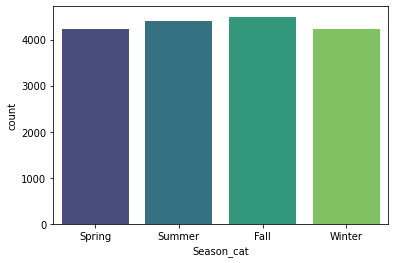

In [231]:
sns.countplot(data = df, x = 'Season_cat', palette = 'viridis')
plt.show()

In [232]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,Spring


<AxesSubplot:xlabel='Season_cat'>

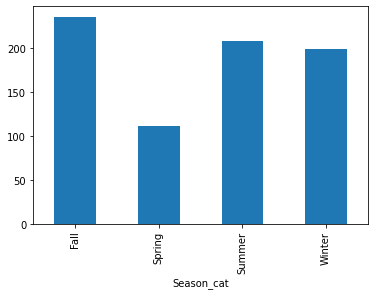

In [233]:
df.groupby(['Season_cat']).mean()['cnt'].plot(kind = 'bar')

<AxesSubplot:xlabel='Season_cat'>

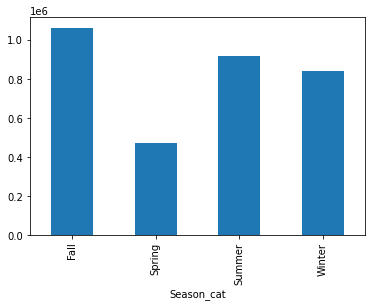

In [234]:
df.groupby(['Season_cat']).sum()['cnt'].plot(kind = 'bar')

In [235]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["Month_cat"] = df['mnth'].map(month_dict)

In [236]:
df["Month_cat"]

0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: Month_cat, Length: 17379, dtype: object

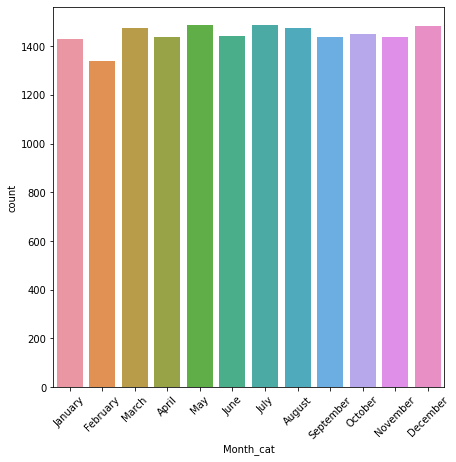

In [237]:
plt.figure(figsize = (7, 7))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'Month_cat')
plt.show()


<AxesSubplot:xlabel='Month_cat'>

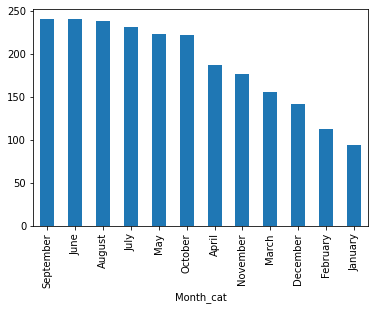

In [238]:
df.groupby(['Month_cat']).mean()['cnt'].sort_values(ascending = False).plot(kind = 'bar')

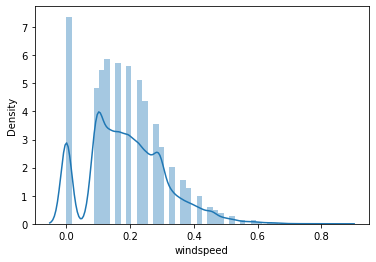

In [239]:
sns.distplot(df['windspeed'])
plt.show()

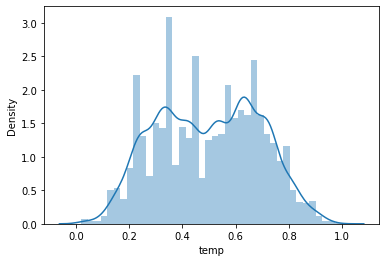

In [240]:
sns.distplot(df['temp'])
plt.show()

In [241]:

def temperature_converter(value):
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    return (value * (temp_max - temp_min) + temp_min)

In [242]:
df['Temperature_converted'] = df['temp'].apply(temperature_converter)

In [243]:
df['Temperature_converted']

0        0.2552
1        0.2356
2        0.2356
3        0.2552
4        0.2552
          ...  
17374    0.2748
17375    0.2748
17376    0.2748
17377    0.2748
17378    0.2748
Name: Temperature_converted, Length: 17379, dtype: float64

<AxesSubplot:xlabel='hr'>

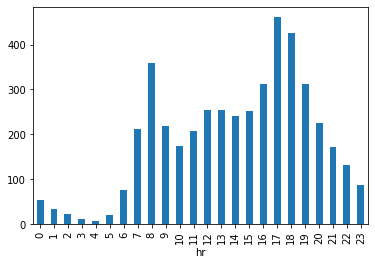

In [244]:
df.groupby(['hr'])['cnt'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='hr'>

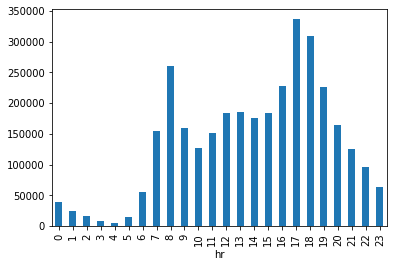

In [245]:
df.groupby(['hr'])['cnt'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='hum', ylabel='Density'>

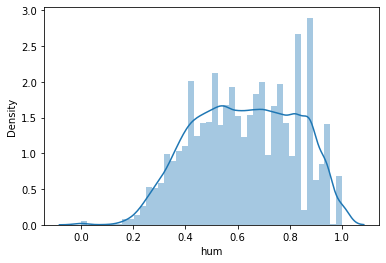

In [246]:
sns.distplot(df['hum'])

In [247]:
import seaborn as sns

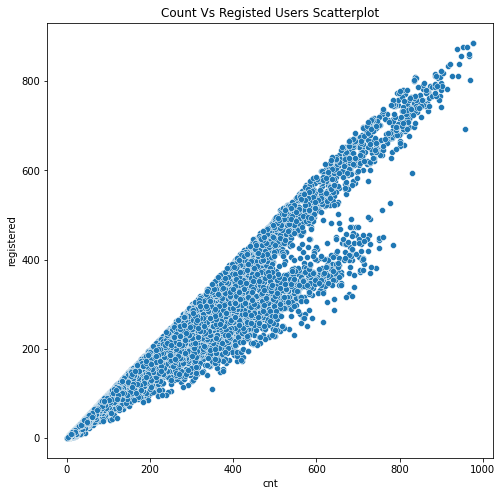

In [248]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'cnt', y = 'registered', data = df)
plt.title('Count Vs Registed Users Scatterplot')
plt.show()

In [249]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


<AxesSubplot:xlabel='casual', ylabel='Density'>

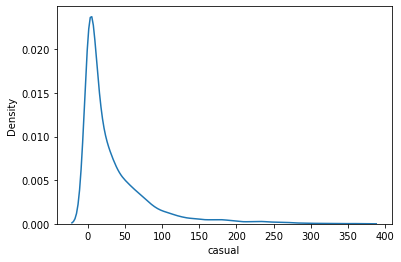

In [250]:
sns.kdeplot(df['casual'])

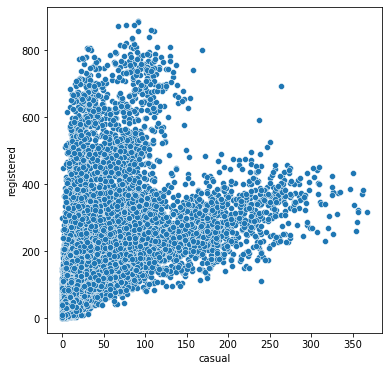

In [251]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'casual', y = 'registered', data = df)
plt.show()

In [252]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [253]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


In [254]:
def temperature_segments(value):
    if value < 0.2:
        return 0.1
    elif value < 0.4 and value > 0.2:
        return 0.3
    elif value < 0.6 and value > 0.4:
        return 0.5
    elif value < 0.7 and value > 0.5:
        return 0.6
    elif value < 0.8 and value > 0.6:
        return 0.7
    elif value < 0.9 and value > 0.7:
        return 0.8
    else:
        return 0.9

In [255]:
df['Temperature_segments'] = df['temp'].apply(temperature_segments)

<AxesSubplot:xlabel='Temperature_segments', ylabel='count'>

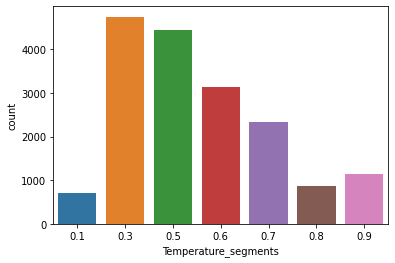

In [256]:
sns.countplot(df['Temperature_segments'])

<AxesSubplot:xlabel='Temperature_segments'>

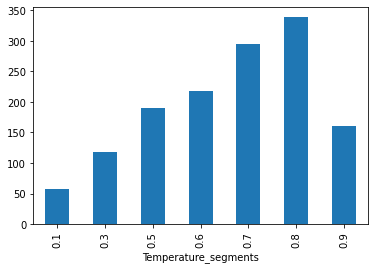

In [257]:
df.groupby(['Temperature_segments']).mean()['cnt'].plot(kind = 'bar')

In [258]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


<AxesSubplot:xlabel='Month_cat'>

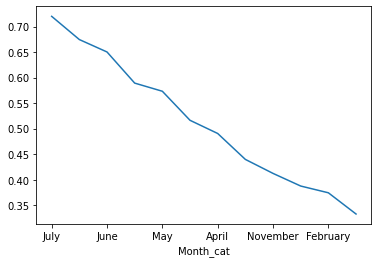

In [259]:
df.groupby(['Month_cat']).mean()['Temperature_segments'].sort_values(ascending = False).plot(kind = 'line')

<AxesSubplot:xlabel='casual', ylabel='cnt'>

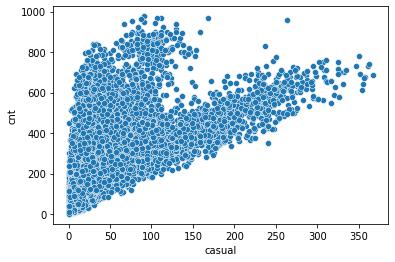

In [260]:
sns.scatterplot(x = 'casual', y = 'cnt', data = df)

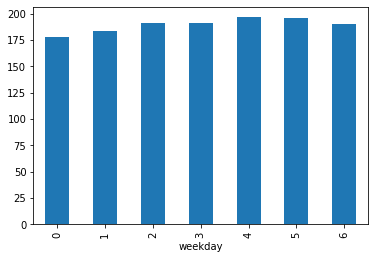

In [261]:
df.groupby(['weekday']).mean()['cnt'].plot(kind = 'bar')
plt.show()

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [263]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


In [264]:
df.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)

In [265]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,0.2552,0.3


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [267]:
df['day'] = df['day'].apply(lambda x: int(x))

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [269]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0.2552,0.3


In [270]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [271]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [272]:
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [273]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


## Machine learning Analysis 

In [274]:
X = df.drop(['cnt'], axis = 1).values
y = df['cnt'].values

In [275]:
X[0: 5]

array([[1.    , 0.    , 1.    , 0.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.81  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 1.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 2.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 3.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 4.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ]])

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [278]:
X_train.shape

(12165, 15)

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [280]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)

In [281]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [282]:
X_train.shape

(12165, 15)

In [283]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['MSE', 'MAE'])

In [284]:
model.fit(X_train, y_train, epochs = 200, verbose = 1, validation_data = (X_cv, y_cv))

Epoch 1/200
381/381 [==============================] - 2s 3ms/step - loss: 45197.4315 - MSE: 45197.4315 - MAE: 152.0431 - val_loss: 20001.7676 - val_MSE: 20001.7676 - val_MAE: 105.1841
Epoch 2/200
381/381 [==============================] - 1s 3ms/step - loss: 20230.4562 - MSE: 20230.4562 - MAE: 104.8352 - val_loss: 18890.7637 - val_MSE: 18890.7637 - val_MAE: 100.2140
Epoch 3/200
381/381 [==============================] - 1s 3ms/step - loss: 18880.8416 - MSE: 18880.8416 - MAE: 99.4341 - val_loss: 17217.4355 - val_MSE: 17217.4355 - val_MAE: 94.5014
Epoch 4/200
381/381 [==============================] - 1s 3ms/step - loss: 16689.3351 - MSE: 16689.3351 - MAE: 93.2909 - val_loss: 15564.6426 - val_MSE: 15564.6426 - val_MAE: 91.2037
Epoch 5/200
381/381 [==============================] - 1s 3ms/step - loss: 15545.9924 - MSE: 15545.9924 - MAE: 88.5703 - val_loss: 13989.8057 - val_MSE: 13989.8057 - val_MAE: 78.5531
Epoch 6/200
381/381 [==============================] - 1s 3ms/step - loss: 13773.

<AxesSubplot:>

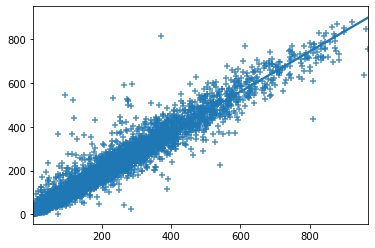

In [285]:
sns.regplot(y_cv, model.predict(X_cv), marker = '+')

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score

In [287]:
model = KNeighborsRegressor()
mean_squared_error_list = []
mean_absolute_error_list = []
roc_auc_score_list = []
K_nearest_neighbors = [2, 3, 5, 8, 10, 11, 15, 20]
for i in K_nearest_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    

In [288]:
knn_dictionary = {'K Nearest Neighbors': K_nearest_neighbors, 'Mean Squared Error': mean_squared_error_list, 'Mean Absolute Error': mean_absolute_error_list}

In [289]:
knn_dataframe = pd.DataFrame(knn_dictionary)

In [290]:
knn_dataframe

,K Nearest Neighbors,Mean Squared Error,Mean Absolute Error
0,2,12945.093019,72.424051
1,3,12987.864808,74.539957
2,5,12878.459095,77.040621
3,8,13144.267915,80.213895
4,10,13318.760696,81.887361
5,11,13412.708021,82.678523
6,15,13905.592335,85.301010
7,20,14263.771953,87.384005


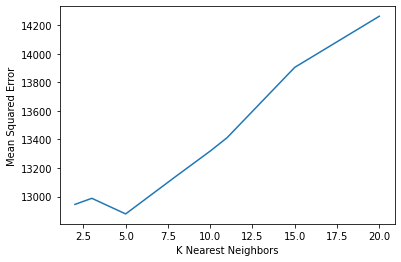

In [291]:
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Squared Error', data = knn_dataframe)
plt.show()

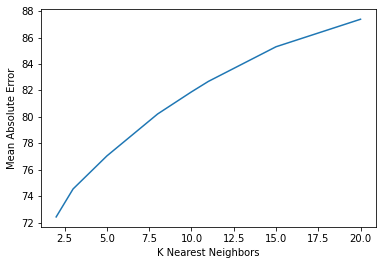

In [292]:
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Absolute Error', data = knn_dataframe)
plt.show()

In [293]:
best_neighbor_index = np.argmin(mean_squared_error_list)

In [294]:
best_neighbor = K_nearest_neighbors[best_neighbor_index]

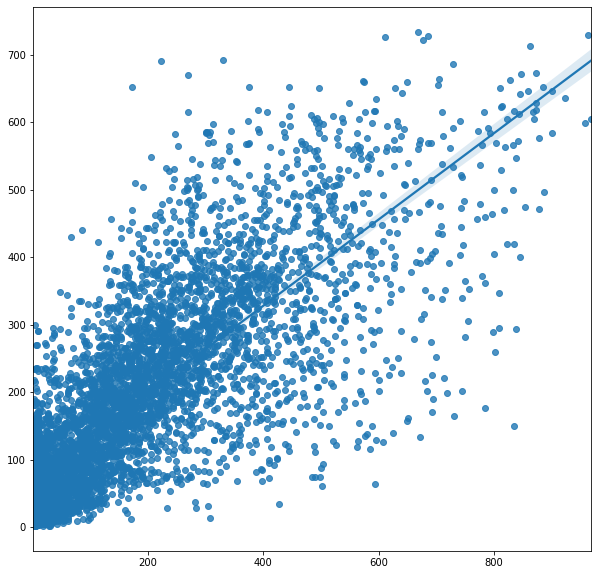

In [295]:
model = KNeighborsRegressor(n_neighbors = best_neighbor)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (10, 10))
sns.regplot(y_cv, y_predict)
plt.show()

In [296]:
from sklearn.cross_decomposition import PLSRegression

In [297]:
n_components_list = [2, 3, 5, 7, 10]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_components_list:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

In [298]:
pls_regression_dict = {'Number of Components': n_components_list, 'Mean Absolute Error': mean_absolute_error_list,
                      'Mean Squared Error': mean_squared_error_list}

In [299]:
pls_regression_dataframe = pd.DataFrame(pls_regression_dict)

In [300]:
pls_regression_dataframe

,Number of Components,Mean Absolute Error,Mean Squared Error
0,2,106.391810,20255.890519
1,3,106.132008,20005.275451
2,5,105.580811,19935.640591
3,7,105.685001,19937.672480
4,10,105.694856,19928.941616


In [301]:
def plot_function(dataframe):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.lineplot(ax = axes[0], x = dataframe.columns[0], y = 'Mean Absolute Error', data = dataframe)
    axes[0].set_title('Number of Components Vs Mean Absolute Error', fontsize = 15)
    sns.lineplot(ax = axes[1], x = dataframe.columns[0], y = 'Mean Squared Error', data = dataframe)
    axes[1].set_title('Number of Components Vs Mean Squared Error', fontsize = 15)
    fig.suptitle("There are the result plots", fontsize = 15)
    fig.tight_layout()

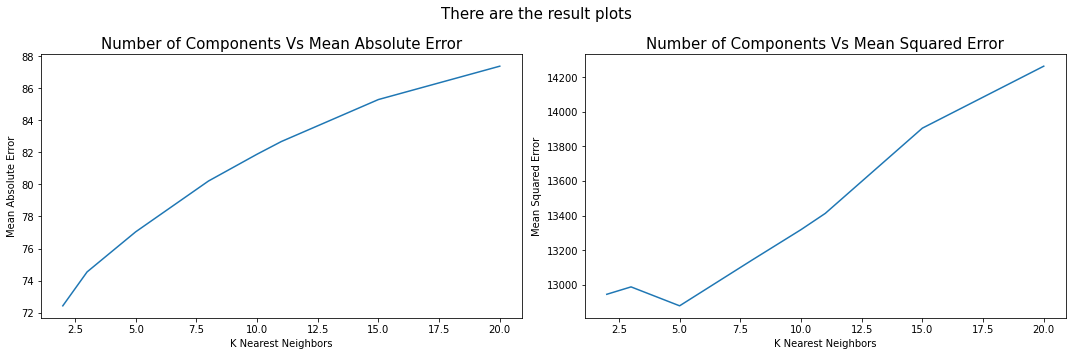

In [302]:
plot_function(knn_dataframe)

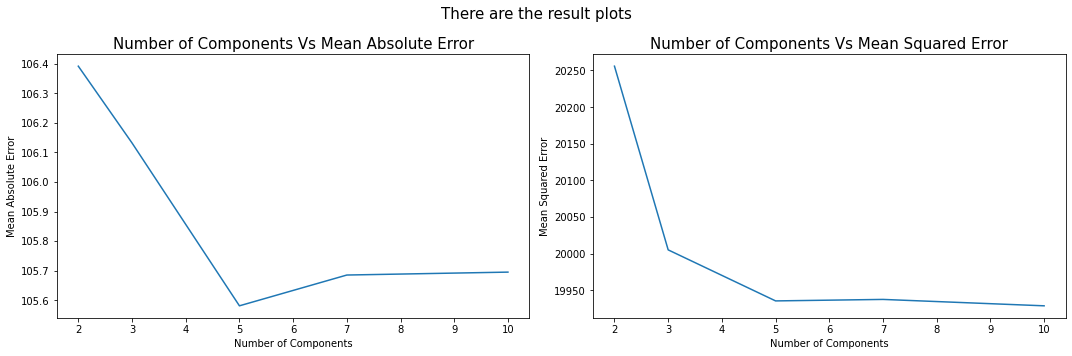

In [303]:
plot_function(pls_regression_dataframe)

In [304]:
from sklearn.tree import DecisionTreeRegressor

In [305]:
max_depth_list = [10, 15, 16, 17, 18, 20, 25]
mean_absolute_error_list = []
mean_squared_error_list = []
for i in max_depth_list:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
decision_tree_dict = {'Max Depth': max_depth_list, 'Mean Absolute Error': mean_absolute_error_list,
                     'Mean Squared Error': mean_squared_error_list}
decision_tree_dataframe = pd.DataFrame(decision_tree_dict)
    

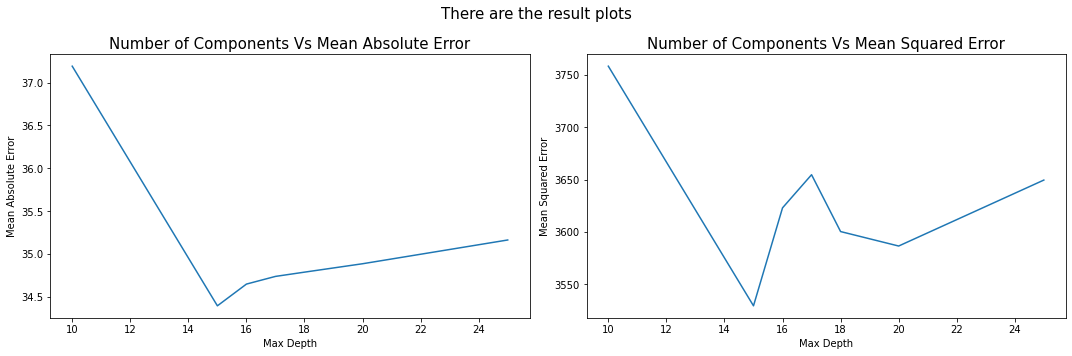

In [306]:
plot_function(decision_tree_dataframe)

In [307]:
best_max_depth_index = np.argmin(mean_absolute_error_list)
best_max_depth = max_depth_list[best_max_depth_index]

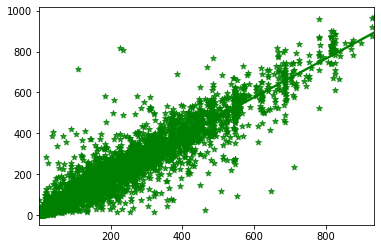

In [308]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
sns.regplot(y_predict, y_cv, marker = '*', color = 'green')
plt.show()

In [309]:
from sklearn.ensemble import GradientBoostingRegressor

In [310]:
n_estimators_list = [25, 50, 100, 150, 200, 400, 1000]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 10)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
    mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))
gradient_boosting_regressor_dict = {"Number of Estimators": n_estimators_list, "Mean Absolute Error": mean_absolute_error_list,
                                   "Mean Squared Error": mean_squared_error_list}
gradient_boosting_regressor_dataframe = pd.DataFrame(gradient_boosting_regressor_dict)

    
    

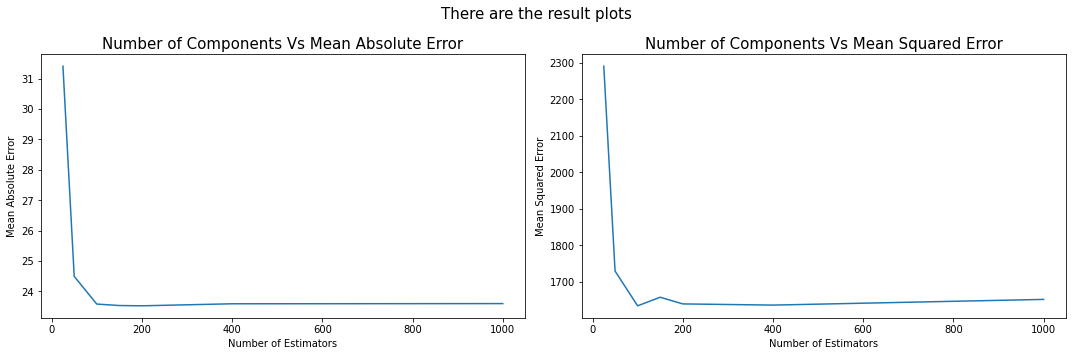

In [311]:
plot_function(gradient_boosting_regressor_dataframe)

In [312]:
gradient_boosting_regressor_dataframe

,Number of Estimators,Mean Absolute Error,Mean Squared Error
0,25,31.404910,2290.631522
1,50,24.495487,1729.590777
2,100,23.586401,1634.446663
3,150,23.538167,1657.925896
4,200,23.528653,1639.685317
5,400,23.595656,1636.416657
6,1000,23.601965,1652.049102


In [313]:
n_estimators_index = np.argmin(mean_squared_error_list)
best_n_estimators = n_estimators_list[n_estimators_index]

In [317]:
model = GradientBoostingRegressor(n_estimators = best_n_estimators, max_depth = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

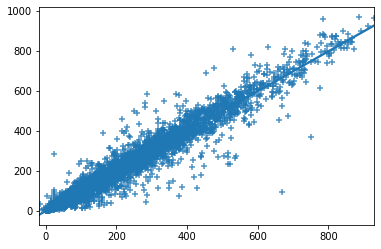

In [320]:
sns.regplot(y_predict, y_cv, marker = '+')
plt.show()